In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cause_death = pd.read_csv('cause_of_deaths.csv')
cause_death.head(50)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
5,Afghanistan,AFG,1995,3102,1225,394,3131,175,1881,2969,...,2248,3974,467,3087,6211,6823,3076,5843,434,3946
6,Afghanistan,AFG,1996,3193,1239,398,3175,175,1969,3331,...,2298,4041,485,3130,6446,7000,3133,5966,450,4098
7,Afghanistan,AFG,1997,3304,1253,402,3250,240,2078,3028,...,2347,4094,504,3203,6677,7168,3200,6096,469,4252
8,Afghanistan,AFG,1998,3281,1267,405,3193,563,2098,3098,...,2388,4120,505,3145,6683,7287,3231,6154,472,4310
9,Afghanistan,AFG,1999,3200,1281,409,3115,468,2084,2917,...,2437,4150,502,3068,6603,7400,3247,6182,470,4332


In [3]:
#what countries are given 
ctries_terr = cause_death['Country/Territory'].unique()
print(len(ctries_terr))
print(ctries_terr)

204
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Ita

In [4]:
#list of all columns 
columns = cause_death.columns
print(len(columns))
print(columns)

34
Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')


In [5]:
years = cause_death['Year'].unique()
print(len(years))
print(years)

30
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [6]:
#does every country have every year ? 
cnt_terr_count = cause_death.groupby('Country/Territory').count()
#if count is less than 30 in any of the columns that means it is missing 
cnt_terr_count[(cnt_terr_count['Year'] != 30)] #no rows return so all years are there


,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Country/Territory,,,,,,,,,,,,,,,,,,,,,


In [7]:
#can we group by continent first? 
countries_continents = pd.read_csv('countries_continents.csv')

del countries_continents['Unnamed: 0']
countries_continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay
193,South America,Venezuela


In [8]:
#add a col in for continent

for index, row in cause_death.iterrows():

    country = cause_death.loc[index, 'Country/Territory'] 
    #find this country in the count cont file
    
    row_cont = countries_continents.loc[countries_continents['Country'] == country]
    try: 
        cause_death.loc[index, 'Continent'] = row_cont['Continent'].iat[0]
    #leaving out territories for now !
    except IndexError:
        pass
    
    

cause_death

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Continent
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,Africa
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,Africa
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,Africa
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,Africa


In [9]:
cause_death[cause_death['Year'] == 1990].groupby('Continent').count()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Asia,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
Europe,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
North America,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Oceania,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
South America,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [10]:
#how many continents each country has 
year_1990 = cause_death[cause_death['Year'] == 1990].groupby('Continent').sum()
year_2019 = cause_death[cause_death['Year'] == 2019].groupby('Continent').sum()

year_2019

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,100950,132586,78137,19703,97158,483713,23981,76546,84408,615498,...,187475,154675,18321,93367,197961,199323,243840,378819,25376,16335
Asia,78741,76427,785999,182372,97098,43962,164663,117048,84242,126248,...,822577,741699,41033,66715,704104,2825574,752916,1255951,55367,59274
Europe,86817,2389,335489,70607,8658,0,10717,12518,429,10996,...,126623,137692,3902,7464,45941,302334,139768,308243,8688,418
North America,44418,2483,56803,12791,12189,463,6106,52641,3871,16503,...,109543,108865,1220,11084,36658,79319,72614,119818,2602,439
Oceania,28266,715,13891,3110,466,1016,884,1471,886,4049,...,12417,7531,234,428,4599,22014,3555,9760,908,125
South America,24228,3692,105549,20403,15441,877,10576,102513,4798,27498,...,115478,105742,965,14322,80660,144870,76038,153047,3880,379


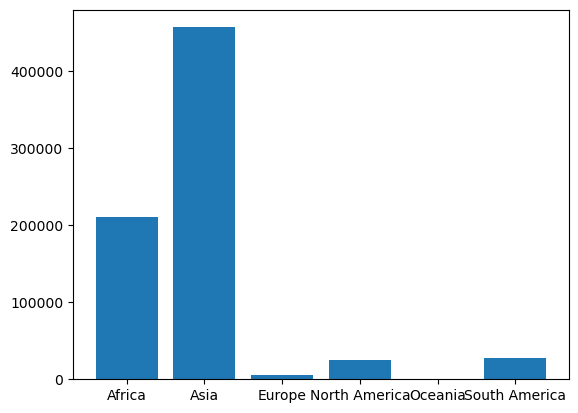

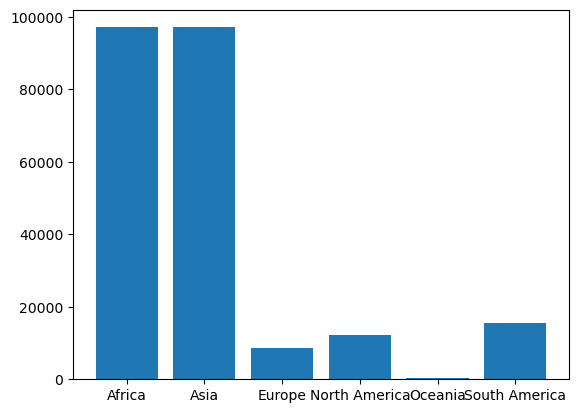

In [11]:
#plotting first year vs last year in dataset for Nutritional def in Africa 

plt.bar(year_1990.index, year_1990['Nutritional Deficiencies'])
plt.show()

plt.bar(year_2019.index, year_2019['Nutritional Deficiencies'])
plt.show()

In [12]:
#interesting to analyze all disorders by continent
#we also need to find percentage of each disease based on population- those numbers need to be added


In [13]:
#convert everything to percentages 


In [14]:
cause_death.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Continent
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,Asia
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,Asia
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,Asia
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,Asia
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,Asia


In [15]:
continent_year = cause_death[cause_death['Year'] == 1990].groupby('Continent').count()
continent_year

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Asia,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
Europe,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
North America,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Oceania,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
South America,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


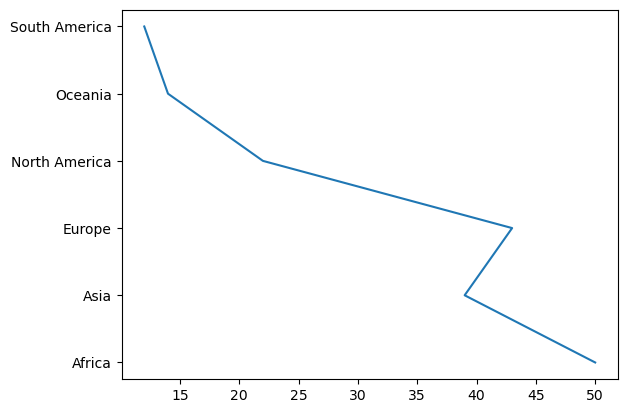

In [16]:
#plot Meningitis for every single continent in 1990 in a line graph 

plt.plot(continent_year['Meningitis'], continent_year.index)



In [17]:
#i need to get all the rows in the df that have 'Africa' in them 
africa = cause_death[cause_death['Continent'] == 'Africa']
year_africa = africa.groupby('Year').sum()
year_africa.head()

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Year,,,,,,,,,,,,,,,,,,,,,
1990,164035,29881,7994,210035,475041,29159,48520,78688,225147,1280,...,77949,75490,17784,202988,154990,138721,153786,234350,22786,23500
1991,164959,30934,8216,209319,489697,29073,51331,78640,292697,1349,...,80048,77276,17737,202306,155439,140708,155646,237538,22783,23432
1992,168644,32082,8479,210135,499676,29143,58171,79447,372240,1452,...,82916,79472,17981,203128,159285,143182,158136,241832,23127,23428
1993,169674,33205,8755,209198,515697,29096,58311,79579,462804,1505,...,85083,81322,17992,202229,160445,145160,160617,245646,23171,23410
1994,169035,34377,9050,207336,525085,29027,56655,80444,561986,1586,...,88229,83500,18057,200416,163150,147985,163256,249879,23373,23554


In [18]:
continent_year.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='Continent')

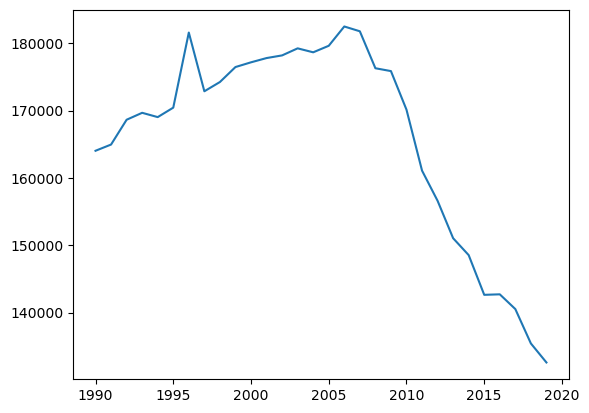

In [19]:
plt.plot(year_africa.index, year_africa['Meningitis'])

Text(0, 0.5, 'Meningitis Cases')

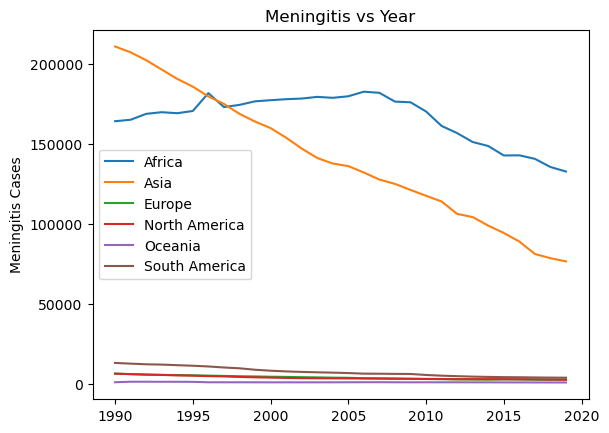

In [20]:
#repeat for all the continents 

for continent in continent_year.index:
    #print(continent)
    cause_continent = cause_death[cause_death['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['Meningitis'])
    
    
plt.legend(continent_year.index)
plt.title('Meningitis vs Year')
plt.ylabel('Meningitis Cases')


Meningitis


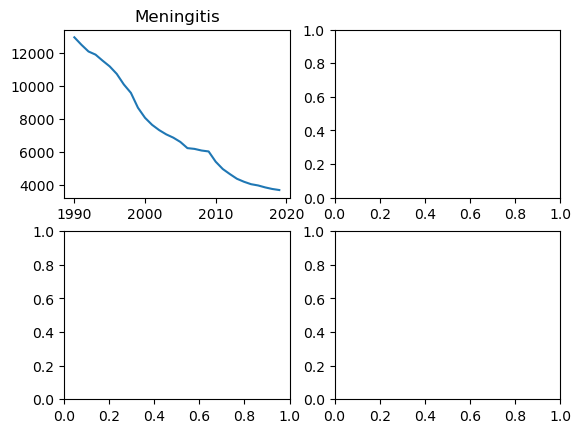

In [21]:
#repeat for all the continents 

figure, axis = plt.subplots(2, 2)

axis_x = 0
axis_y =0
for disease in ['Meningitis', 'Nutritional Deficiencies', 'Malaria', 'Drowning']:
    
    print(disease)
#     if disease == 'Country/Territory' or disease == 'Code' or disease == 'Year':
#         continue
    #for index, row in types_df.iterrows():
    for continent in continent_year:
        
        year_continent = cause_continent.groupby('Year').sum()
        cause_continent = cause_death[cause_death['Continent'] == continent]
        axis[axis_x, axis_y].plot(year_continent.index, year_continent[disease])
        axis[axis_x, axis_y].set_title(disease)

    break
        

        

        
        

#     plt.legend(continent_year.index)
#     plt.title('Meningitis vs Year')
#     plt.ylabel('Meningitis Cases')


In [22]:
#plotting several at once for difference continents and single disease over the years 
# figure, axis = plt.subplots(2, 2)
# axis_x = 0
# axis_y =0

for continent in ['Africa', 'Asia', 'North America', 'South America']:
    continent = cause_death[cause_death['Continent'] == 'Africa']
    year_continent = continent.groupby('Year').sum()
    #print(year_continent.head())
    #plt.plot(year_continent.index, year_continent[continent])
    print(year_continent[continent])
    break


      Meningitis  Alzheimer's Disease and Other Dementias  \
Year                                                        
1990         NaN                                      NaN   
1991         NaN                                      NaN   
1992         NaN                                      NaN   
1993         NaN                                      NaN   
1994         NaN                                      NaN   
1995         NaN                                      NaN   
1996         NaN                                      NaN   
1997         NaN                                      NaN   
1998         NaN                                      NaN   
1999         NaN                                      NaN   
2000         NaN                                      NaN   
2001         NaN                                      NaN   
2002         NaN                                      NaN   
2003         NaN                                      NaN   
2004         NaN        

In [23]:
#use color map to plot all the diseases in africa for 1 year 1990

import seaborn as sns

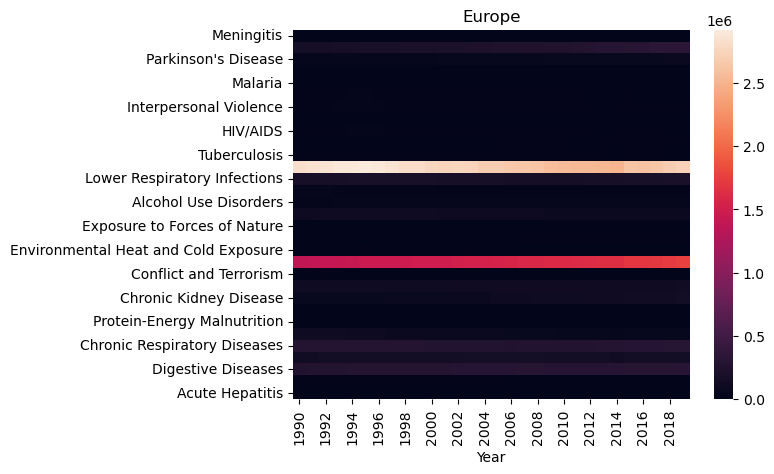

In [24]:
#i need to get all the rows in the df that have 'Africa' in them 
europe = cause_death[cause_death['Continent'] == 'Europe']
year_europe = europe.groupby('Year').sum()
year_europe.head()

columns = cause_death.columns
diseases = columns.tolist()
diseases = diseases[2:-1]
diseases

color_map = europe[diseases].groupby('Year').sum()
color_map = color_map.loc[year_europe.index.tolist()]
color_map = color_map.T
color_map

ax = sns.heatmap(color_map)
#sns.set(font_scale=0.1)
plt.title('Europe')

#plt.show()
plt.savefig('europe.png')

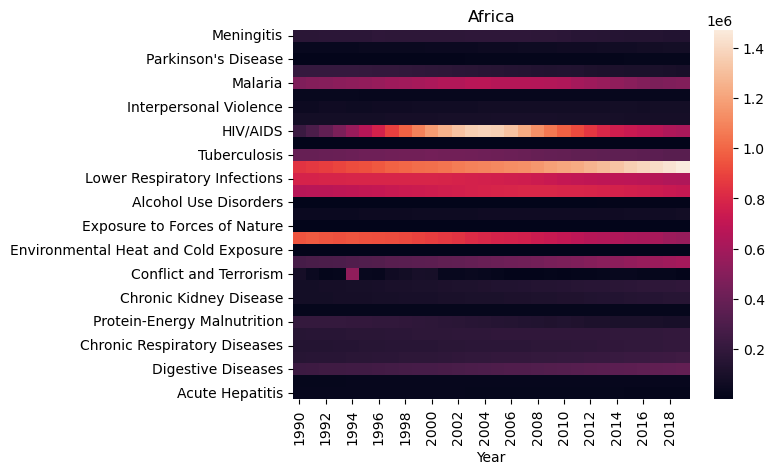

In [25]:
columns = cause_death.columns
diseases = columns.tolist()
diseases = diseases[2:-1]
diseases

color_map = africa[diseases].groupby('Year').sum()
color_map = color_map.loc[year_africa.index.tolist()]
color_map = color_map.T
color_map

ax = sns.heatmap(color_map)
#sns.set(font_scale=0.1)
plt.title('Africa')

plt.show()

In [26]:
#pvflights = flights.pivot_table(values='passengers',index='month',columns='year')



# import seaborn as sns
# #import matplotlib.pyplot as plt
# #from numpy import arange
# # here set the scale by 3
# sns.set(font_scale=3)
# x = arange(25).reshape(5, 5)
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# ax = sns.heatmap(x, cmap=cmap)
# plt.show()


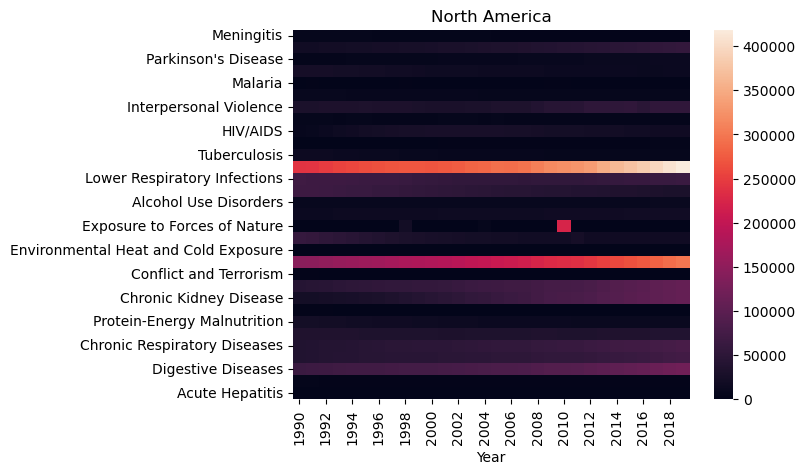

In [27]:
#i need to get all the rows in the df that have 'Africa' in them 
north_america = cause_death[cause_death['Continent'] == 'North America']
year_north_america = north_america.groupby('Year').sum()
year_north_america.head()

columns = cause_death.columns
diseases = columns.tolist()
diseases = diseases[2:-1]
diseases

color_map = north_america[diseases].groupby('Year').sum()
color_map = color_map.loc[year_north_america.index.tolist()]
color_map = color_map.T
color_map

ax = sns.heatmap(color_map)
#sns.set(font_scale=0.1)
plt.title('North America')

plt.show()

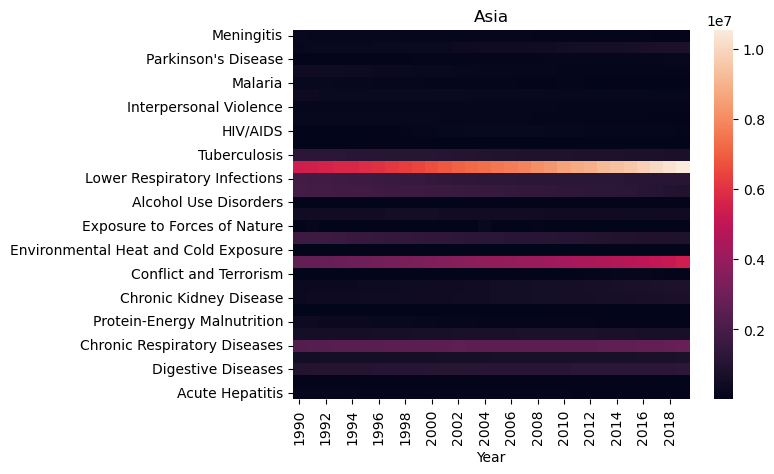

In [28]:
#i need to get all the rows in the df that have 'Africa' in them 
asia = cause_death[cause_death['Continent'] == 'Asia']
year_asia = asia.groupby('Year').sum()
year_asia.head()

columns = cause_death.columns
diseases = columns.tolist()
diseases = diseases[2:-1]
diseases

color_map = asia[diseases].groupby('Year').sum()
color_map = color_map.loc[year_asia.index.tolist()]
color_map = color_map.T
color_map

ax = sns.heatmap(color_map)
#sns.set(font_scale=0.5)
plt.title('Asia')

plt.show()

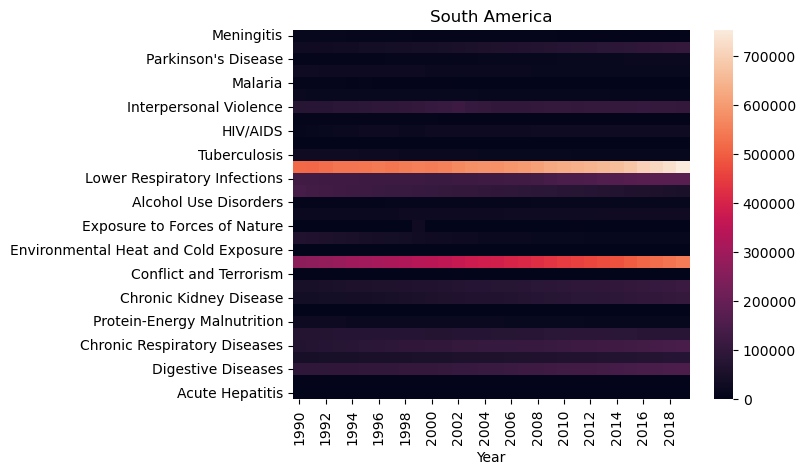

In [29]:
#i need to get all the rows in the df that have 'Africa' in them 
south_america = cause_death[cause_death['Continent'] == 'South America']
year_south_america = south_america.groupby('Year').sum()
year_south_america.head()

columns = cause_death.columns
diseases = columns.tolist()
diseases = diseases[2:-1]
diseases

color_map = south_america[diseases].groupby('Year').sum()
color_map = color_map.loc[year_south_america.index.tolist()]
color_map = color_map.T
color_map

ax = sns.heatmap(color_map)
#sns.set(font_scale=0.5)
plt.title('South America')
plt.show()

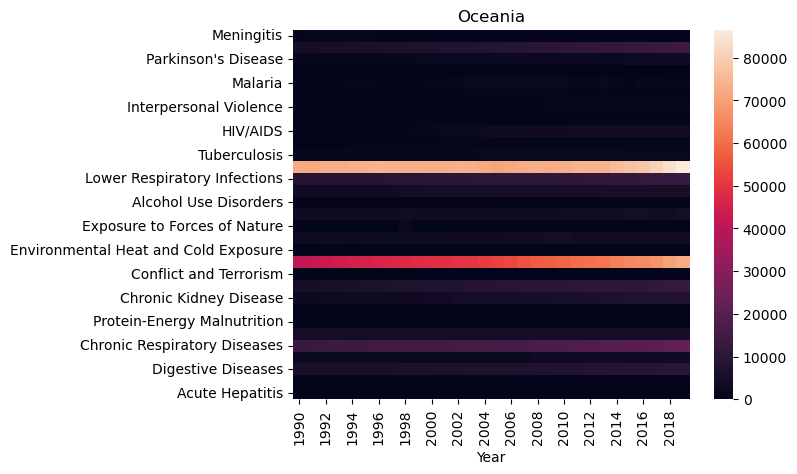

In [30]:
#i need to get all the rows in the df that have 'Africa' in them 
oceania = cause_death[cause_death['Continent'] == 'Oceania']
year_oceania = oceania.groupby('Year').sum()
year_oceania.head()

columns = cause_death.columns
diseases = columns.tolist()
diseases = diseases[2:-1]
diseases

color_map = oceania[diseases].groupby('Year').sum()
color_map = color_map.loc[year_oceania.index.tolist()]
color_map = color_map.T
color_map

ax = sns.heatmap(color_map)
plt.title('Oceania')
#sns.set(font_scale=2)
plt.show()

In [31]:
north_america = cause_death[cause_death['Continent'] == 'North America']
year_north_america = north_america.groupby('Year').sum()
year_north_america.head()


,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Year,,,,,,,,,,,,,,,,,,,,,
1990,6266,18446,4292,24490,541,8859,29958,5131,7303,891,...,42043,21656,1794,21637,35252,37353,37241,64559,3459,591
1991,5951,19101,4443,24065,1785,8631,30789,4991,9669,957,...,43413,22658,1714,21318,35018,38117,38148,65676,3362,583
1992,5670,19827,4633,23438,1179,8470,31465,5185,12446,1022,...,45382,23973,1661,20774,34987,39281,39358,67288,3253,572
1993,5452,20612,4859,22759,1429,8320,31696,4764,15396,1125,...,47678,25476,1614,20143,35020,40781,40910,69258,3176,561
1994,5153,21428,5064,21791,1623,8058,32610,5012,17964,1185,...,49604,26932,1544,19286,34692,41870,41935,70419,3057,552


In [43]:
#we know that 2010, Exposures to Forces of Nature had a spike - find which country/countries were causes it:
#this was the 2010 Haiti earthquake 

#query for north america 2010
na_outlier = cause_death[cause_death['Continent'] == 'North America']
na_outlier = na_outlier[na_outlier['Year'] == 2010]

#sort by value of outlier var 
na_outlier = na_outlier.sort_values('Exposure to Forces of Nature', ascending = False)

na_outlier[['Country/Territory', 'Exposure to Forces of Nature']]

,Country/Territory,Exposure to Forces of Nature
2330,Haiti,222641
3410,Mexico,206
2210,Guatemala,177
2360,Honduras,144
3830,Nicaragua,77
1280,Costa Rica,51
1670,El Salvador,22
2660,Jamaica,15
4580,Saint Lucia,14
980,Canada,11


In [44]:
#we know that 1994, Conflict and Terrorism had a spike - find which country/countries were causes it:

#query for Africa 1994
na_outlier = cause_death[cause_death['Continent'] == 'Africa']
na_outlier = na_outlier[na_outlier['Year'] == 1994]

#sort by value of outlier var 
na_outlier = na_outlier.sort_values('Conflict and Terrorism', ascending = False)

na_outlier[['Country/Territory', 'Conflict and Terrorism']]

,Country/Territory,Conflict and Terrorism
4504,Rwanda,503532
874,Burundi,12765
154,Angola,4117
3004,Liberia,3788
64,Algeria,2428
4834,Sierra Leone,2300
3244,Mali,830
5174,Sudan,827
5014,South Africa,540
1058,Chad,522
